# scVelo and Diffusion Mapping on HSCs

In [50]:
%load_ext rpy2.ipython

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline
import copy
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad
import scipy
import seaborn as sns

sc.set_figure_params(scanpy=True, dpi_save=200)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [51]:
# already imputed and MNN corrected
adata = sc.read("../scRNA_imputed2.h5ad")
adata

AnnData object with n_obs × n_vars = 1369 × 10000 
    obs: 'Donor', 'Plate', 'CD45RA', 'CD34', 'CD38', 'CD49f', 'CD90', 'log10_total_counts', 'log10_total_features_by_counts', 'pct_counts_MT', 'S.Score', 'G2M.Score', 'Cycle.Score', 'Cycling', 'Stemness.Score', 'DNMT3A.Score', 'DNMT3A_mut', 'median_gene_length', 'batch', 'DCA_split', 'n_counts', 'size_factors', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'louvain', 'root', 'end'
    var: 'n_cells-BM4', 'n_counts-BM4', 'means-BM4', 'dispersions-BM4', 'dispersions_norm-BM4', 'n_cells-BM3', 'n_counts-BM3', 'means-BM3', 'dispersions-BM3', 'dispersions_norm-BM3', 'n_cells-BM2', 'n_counts-BM2', 'means-BM2', 'dispersions-BM2', 'dispersions_norm-BM2', 'n_cells-BM1', 'n_counts-BM1', 'means-BM1', 'dispersions-BM1', 'dispersions_norm-BM1', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'Donor_colors', 'diffmap_evals', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'velocity_graph', 'velocity_graph_neg'
    obsm

### Fill in metadata with gene set scores

In [52]:
# Get the cell names from adata but manually remove the -BM
adata_index_values = np.chararray.replace(adata.obs_names.values.astype('U'), '-BM4', '')
adata_index_values = np.chararray.replace(adata_index_values, '-BM3', '')
adata_index_values = np.chararray.replace(adata_index_values, '-BM2', '')
adata_index_values = np.chararray.replace(adata_index_values, '-BM1', '')

# rename obs_names without this -BM
adata.obs_names = adata_index_values

# rearrange (and filter, as necessary) scored_data to correspond to adata_index_values 
scored_data = scored_data[adata_index_values]

In [57]:
adata = adata[adata.obs.Donor != "BM1"]

In [54]:
cell_cycle_genes = pd.read_csv("/mnt/c/Users/azeng/OneDrive/Desktop/Dick_Lab/scRNA_HSC/sam/scran_normalized/custom_scoring/cycle_genes.csv").Gene
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
adata

Trying to set attribute `.obs` of view, copying.


AnnData object with n_obs × n_vars = 1191 × 10000 
    obs: 'Donor', 'Plate', 'CD45RA', 'CD34', 'CD38', 'CD49f', 'CD90', 'log10_total_counts', 'log10_total_features_by_counts', 'pct_counts_MT', 'S.Score', 'G2M.Score', 'Cycle.Score', 'Cycling', 'Stemness.Score', 'DNMT3A.Score', 'DNMT3A_mut', 'median_gene_length', 'batch', 'DCA_split', 'n_counts', 'size_factors', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'louvain', 'root', 'end', 'S_score', 'G2M_score', 'phase'
    var: 'n_cells-BM4', 'n_counts-BM4', 'means-BM4', 'dispersions-BM4', 'dispersions_norm-BM4', 'n_cells-BM3', 'n_counts-BM3', 'means-BM3', 'dispersions-BM3', 'dispersions_norm-BM3', 'n_cells-BM2', 'n_counts-BM2', 'means-BM2', 'dispersions-BM2', 'dispersions_norm-BM2', 'n_cells-BM1', 'n_counts-BM1', 'means-BM1', 'dispersions-BM1', 'dispersions_norm-BM1', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'Donor_colors', 'diffmap_evals', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'velocity_grap

# Clustering

In [ ]:
scv.pp.moments(adata, n_neighbors=30, n_pcs=30, mode="connectivities")

In [ ]:
# Get clusters
scv.tl.louvain(adata, resolution=0.6, random_state=4)

# Generate velocities

In [ ]:
scv.tl.velocity(adata)

In [ ]:
scv.tl.velocity_graph(adata)

# Project the velocity graph onto an embedding

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_diffmap', embedded velocity vectors (adata.obsm)


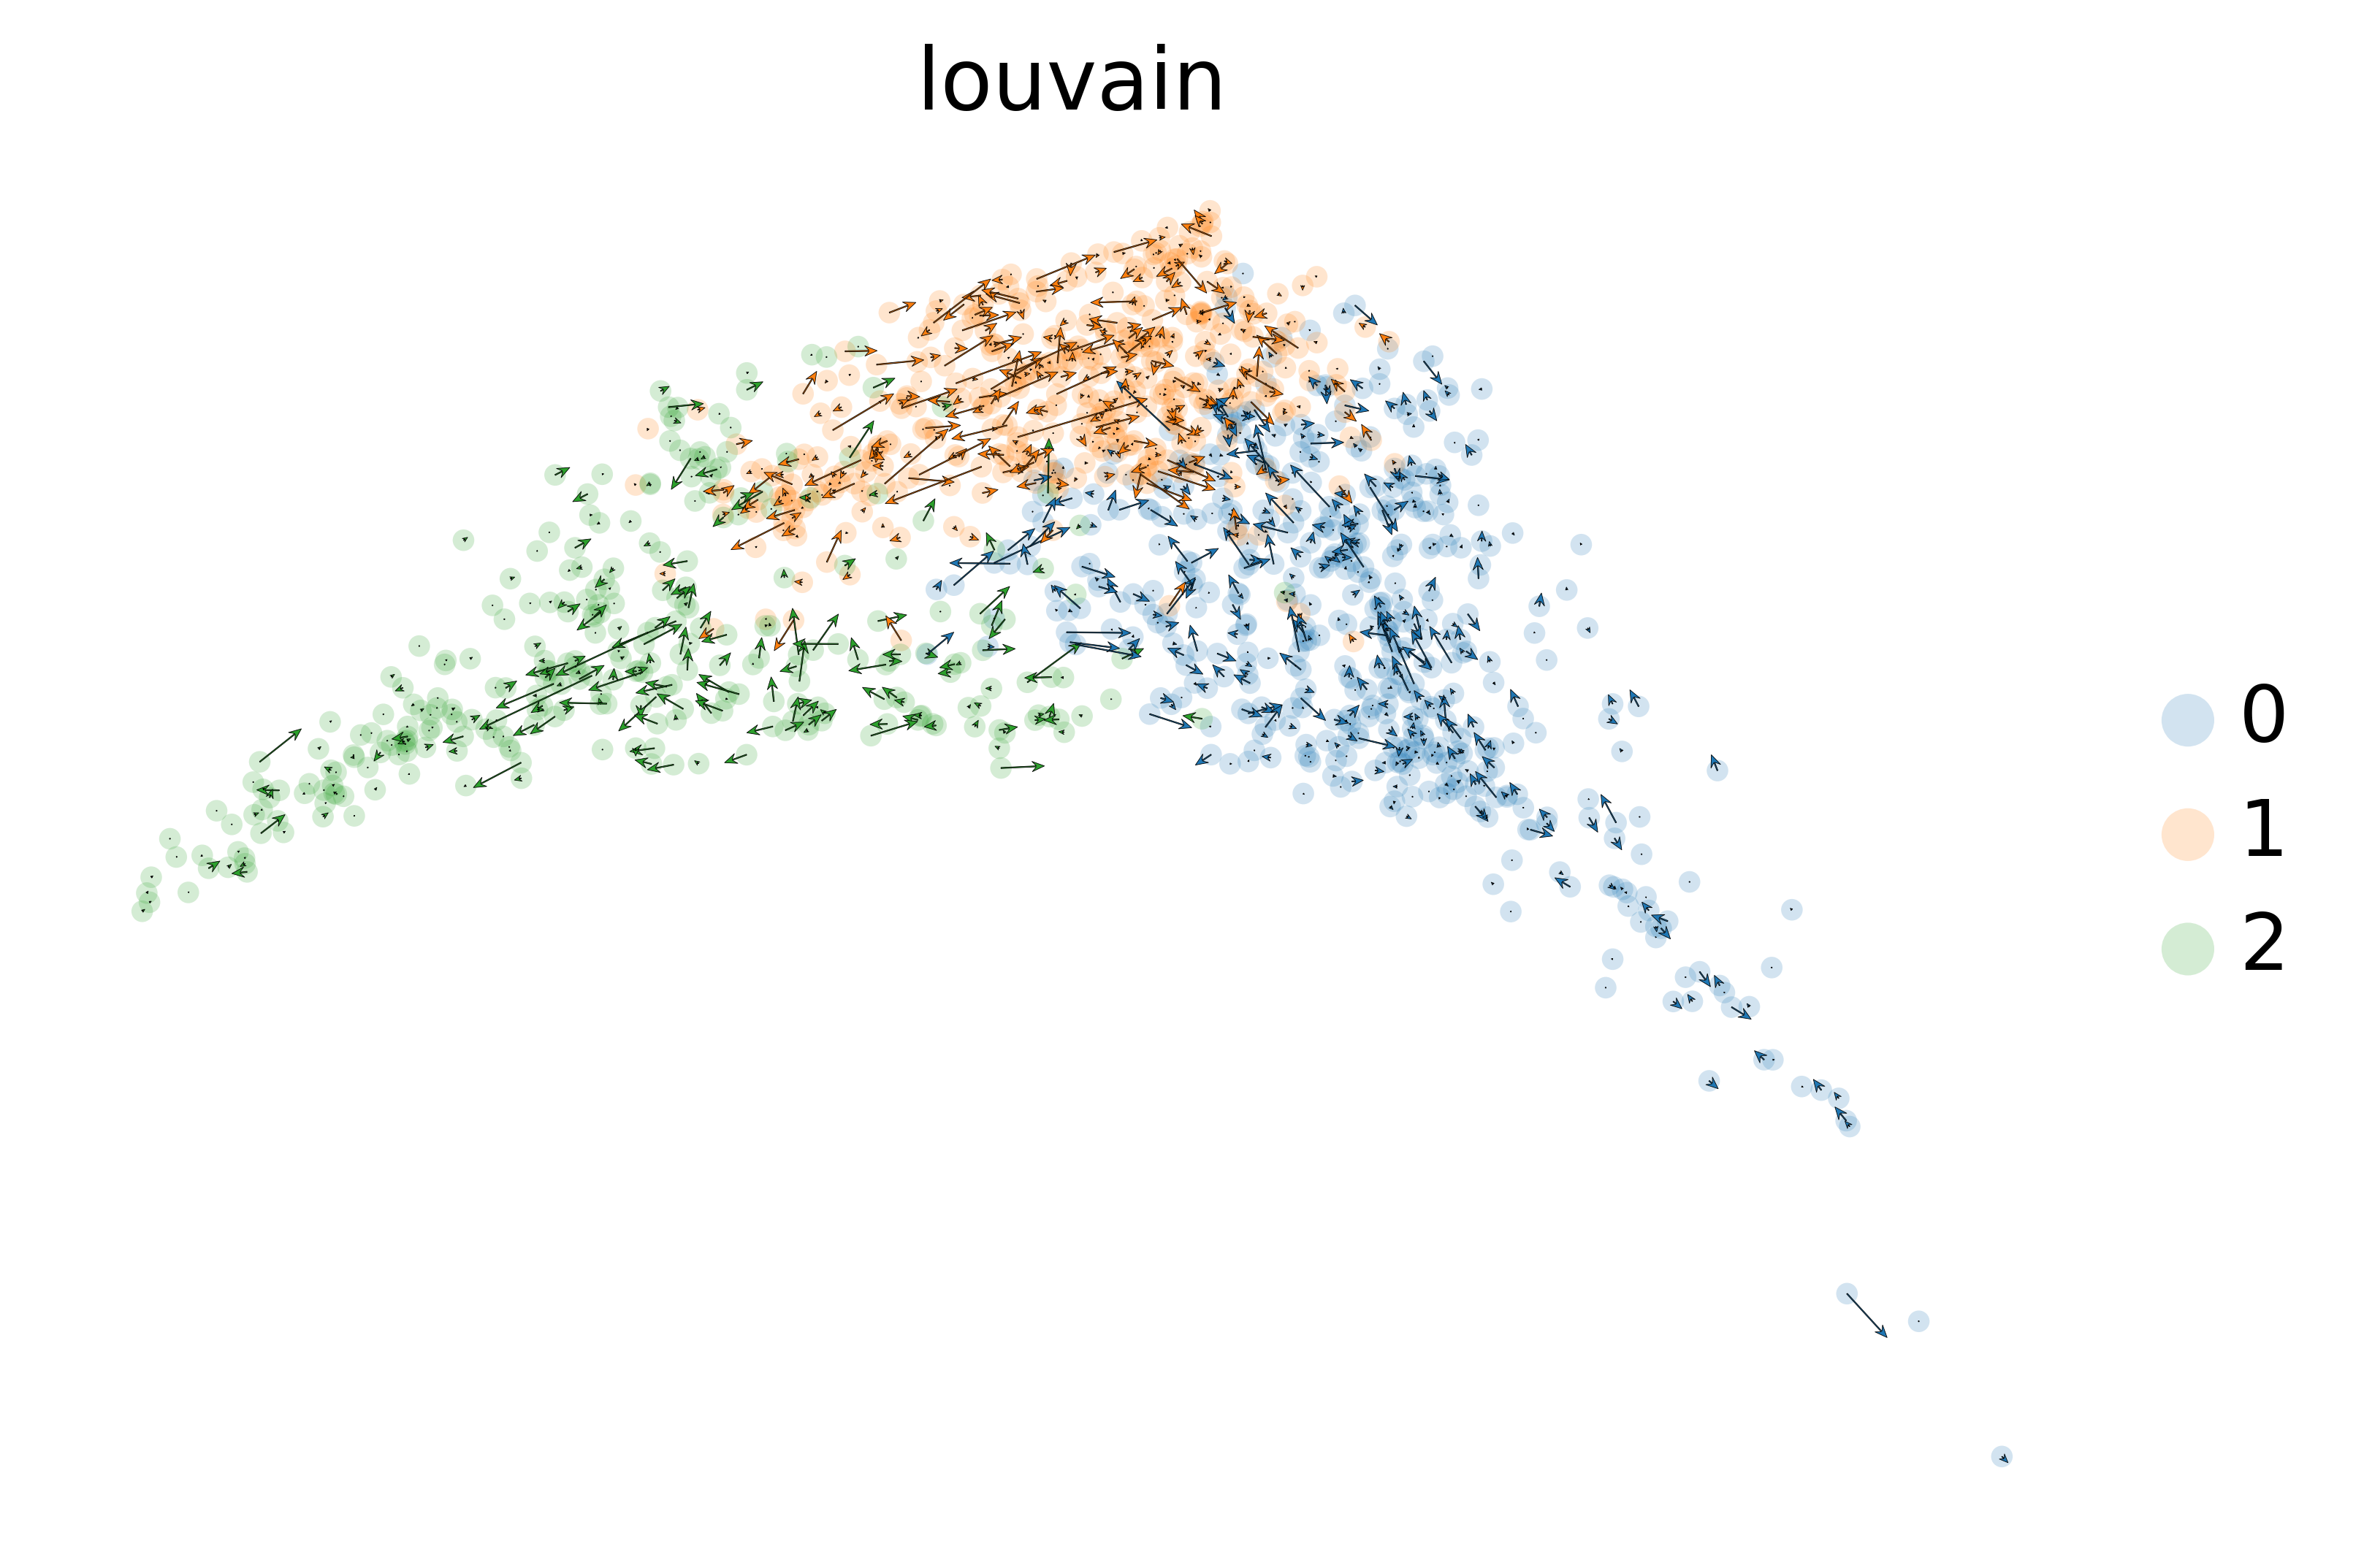

In [271]:
scv.tl.diffmap(adata, n_comps=30)
scv.tl.velocity_embedding(adata, basis='diffmap')
scv.pl.velocity_embedding(adata, basis='diffmap', dpi=300, legend_loc='right margin', components=[1,2])

## DPT on non-cycling

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
layers concatenation is not yet available for 'outer' intersection and will be ignored.
/home/azeng/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1172: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'grouping' as categorical


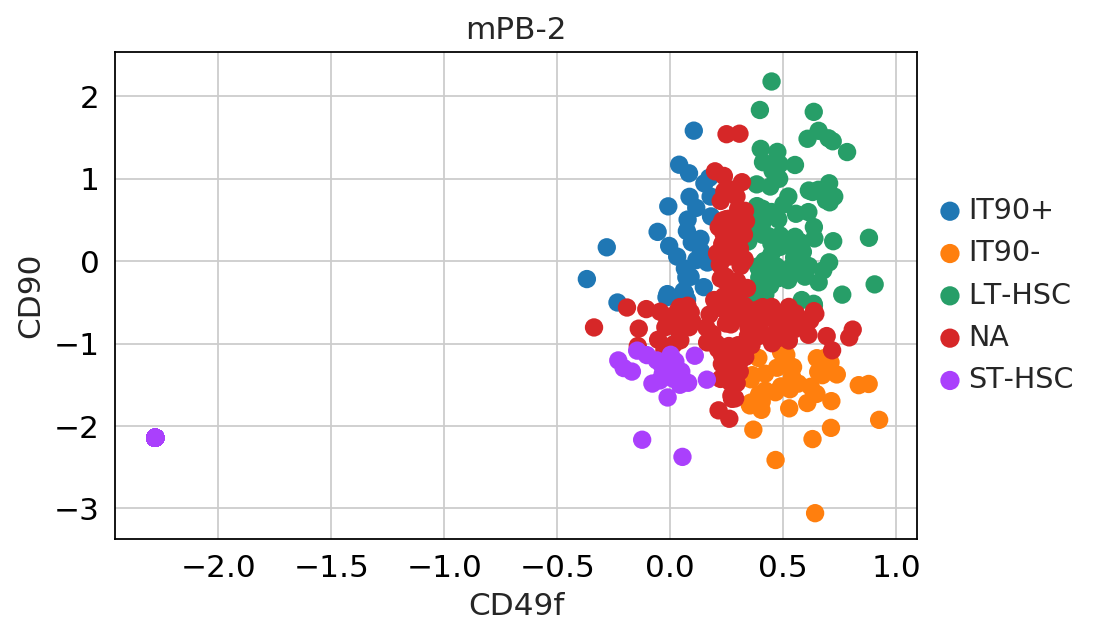

Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'grouping' as categorical


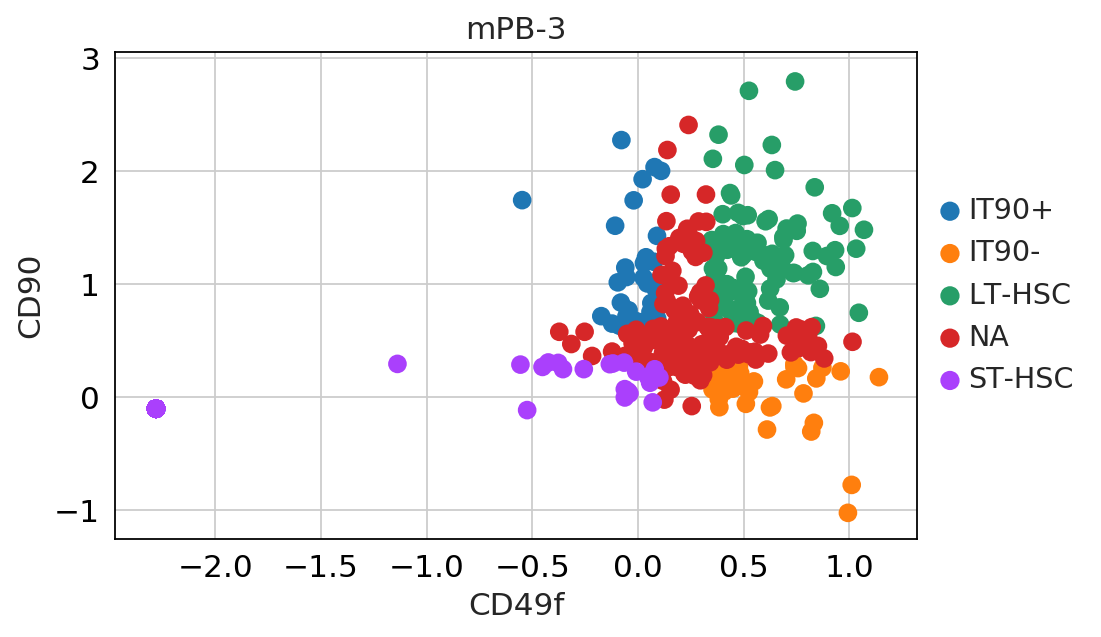

Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'grouping' as categorical


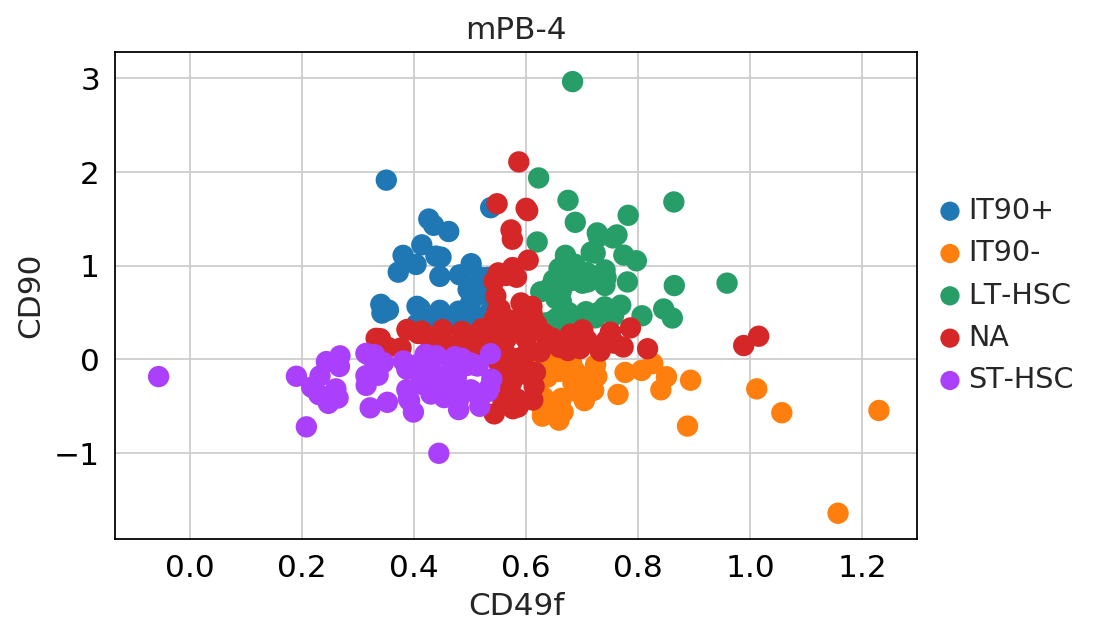

In [69]:
flowdata = adata.copy()
#flowdata = flowdata[flowdata.obs['CD34'] > 0]

def flowsort(flowdata, high, low):
    
    CD49f_plus = flowdata.obs['CD49f'] > np.quantile(flowdata.obs['CD49f'], high)
    CD49f_minus = flowdata.obs['CD49f'] < np.quantile(flowdata.obs['CD49f'], low)
    CD90_plus = flowdata.obs['CD90'] > np.quantile(flowdata.obs['CD90'], high)
    CD90_minus = flowdata.obs['CD90'] < np.quantile(flowdata.obs['CD90'], low)
    
    flowdata.obs['grouping'] = np.where(CD90_plus & CD49f_plus, "LT-HSC", 
                                       np.where(CD90_minus & CD49f_minus, "ST-HSC",
                                              np.where(CD90_plus & CD49f_minus, "IT90+",
                                                       np.where(CD90_minus & CD49f_plus, "IT90-", "NA"))))
    return flowdata

flowdata.obs['CD90'] = scipy.stats.zscore(flowdata.obs['CD90'])
flowdata.obs['CD49f'] = scipy.stats.zscore(flowdata.obs['CD49f'])

flowBM2 = flowsort(flowdata[flowdata.obs['Donor'] == "BM2"], 0.6, 0.4)
flowBM3 = flowsort(flowdata[flowdata.obs['Donor'] == "BM3"], 0.6, 0.4)
flowBM4 = flowsort(flowdata[flowdata.obs['Donor'] == "BM4"], 0.6, 0.4)

flow_sorted = flowBM4.concatenate(flowBM3, flowBM2, join='outer')

flow_sorted.obs_names = flowdata.obs_names
flowdata.obs['grouping'] = flow_sorted.obs['grouping']

sc.pl.scatter(flowdata[flowdata.obs['Donor'] == "BM2"] , y = 'CD90', x = 'CD49f', color = 'grouping', title="mPB-2", save="_mPB2_gating.png")
sc.pl.scatter(flowdata[flowdata.obs['Donor'] == "BM3"] , y = 'CD90', x = 'CD49f', color = 'grouping', title="mPB-3", save="_mPB3_gating.png")
sc.pl.scatter(flowdata[flowdata.obs['Donor'] == "BM4"] , y = 'CD90', x = 'CD49f', color = 'grouping', title="mPB-4", save="_mPB4_gating.png")

In [293]:
outlier_names = ['onefilepercell_BM1_1_AACACGCATCTG_and_others_HMZXA:BM2_5_GATGCAGACCAA.fq_Aligned.sortedByCoord.out.bam-0',
       'onefilepercell_BM1_1_AACACGCATCTG_and_others_HMZXA:BM2_5_TACTGCAAGGAG.fq_Aligned.sortedByCoord.out.bam-0',
       'onefilepercell_BM1_2_AACACGCATCTG_and_others_38YD9:BM2_6_AGAGTCTTGACC.fq_Aligned.sortedByCoord.out.bam-1']

In [389]:
# diffusion pseudotime 
adata.uns['iroot'] = np.flatnonzero(adata.obs['louvain']  == '2')[0]
adata_temp_dpt = adata[~adata.obs.index.isin(outlier_names)]
sc.tl.dpt(adata_temp_dpt, n_branchings=0)

Trying to set attribute `.uns` of view, making a copy.


In [390]:
adata_temp_dpt

AnnData object with n_obs × n_vars = 1188 × 10000 
    obs: 'Donor', 'Plate', 'CD45RA', 'CD34', 'CD38', 'CD49f', 'CD90', 'log10_total_counts', 'log10_total_features_by_counts', 'pct_counts_MT', 'S.Score', 'G2M.Score', 'Cycle.Score', 'Cycling', 'Stemness.Score', 'DNMT3A.Score', 'DNMT3A_mut', 'median_gene_length', 'batch', 'DCA_split', 'n_counts', 'size_factors', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'louvain', 'root', 'end', 'CLEAR.Score', 'Full.ActHSPC.Score', 'Top.ActHSPC.Score', 'ATF4.Upregulated.Score', 'ATF4.Downregulated.Score', '4HPR.Upregulated.Score', '3Factor.Upregulated.Score', 'dHSC.HighConf.Score', 'dHSC.Score', 'aHSC.Score', 'MPP.Score', 'DC1', 'S_score', 'G2M_score', 'phase', 'dpt_pseudotime'
    var: 'n_cells-BM4', 'n_counts-BM4', 'means-BM4', 'dispersions-BM4', 'dispersions_norm-BM4', 'n_cells-BM3', 'n_counts-BM3', 'means-BM3', 'dispersions-BM3', 'dispersions_norm-BM3', 'n_cells-BM2', 'n_counts-BM2', 'means-BM2', 'dispersions-BM2', 'dispersio

In [452]:
# add the outliers and assign dpt of 1
adata_outliers = adata[adata.obs.index.isin(outlier_names)]
adata_outliers.obs['dpt_pseudotime'] = 1

adata_dpt = adata.copy()
sc.pp.scale(adata_dpt)
adata_dpt.obs = adata_dpt.obs.merge(adata_temp_dpt.obs[['dpt_pseudotime']], how='left', left_index=True, right_index=True)
adata_dpt.obs['Diffusion Pseudotime'] = np.where(adata_dpt.obs['dpt_pseudotime'].isna(), 1, adata_dpt.obs['dpt_pseudotime'])

Trying to set attribute `.obs` of view, making a copy.


In [453]:
adata_dpt.obs['Cycle Score'] = scipy.stats.zscore(adata_dpt.obs['S_score'] + adata_dpt.obs['G2M_score'])
adata_dpt.obs['Donor'] = np.where(adata_dpt.obs['Donor'] == "BM2", "mPB-2", 
                                 np.where(adata_dpt.obs['Donor'] == "BM3", "mPB-3", "mPB-4"))

In [ ]:
sc.pl.diffmap(adata_dpt, color=['Cycle Score', 'CDK6', 'INKA1', 'PAK4'], ncols=4, save = "_Cycle_CDK6_INKA1_PAK4.png")

In [ ]:
sc.pl.diffmap(adata_dpt, color=['Diffusion Pseudotime'], ncols=4, save = "_DPT.png")

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

sc.pl.diffmap(adata_dpt, color=['NECTIN2'], save = "_NECTIN2.png")

NameError: name 'sc' is not defined

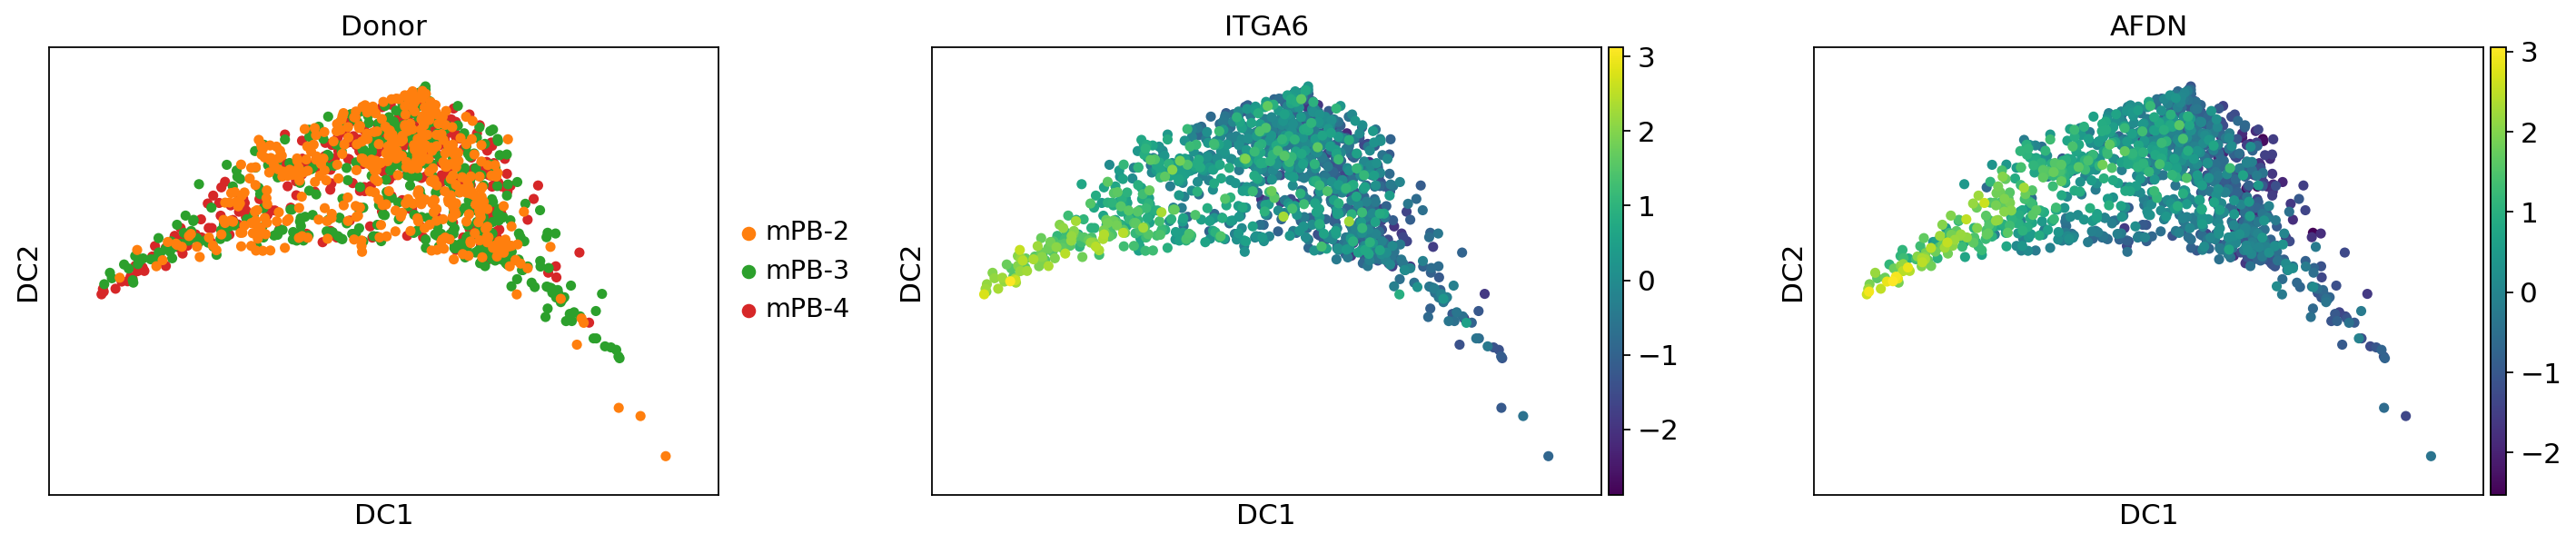

In [474]:
sc.pl.diffmap(adata_dpt, color=['Donor', 'ITGA6', 'AFDN'], ncols=3, wspace=0.2, save = "_Donor_ITGA6_AFDN.png")

Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'grouping' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Population' as categorical


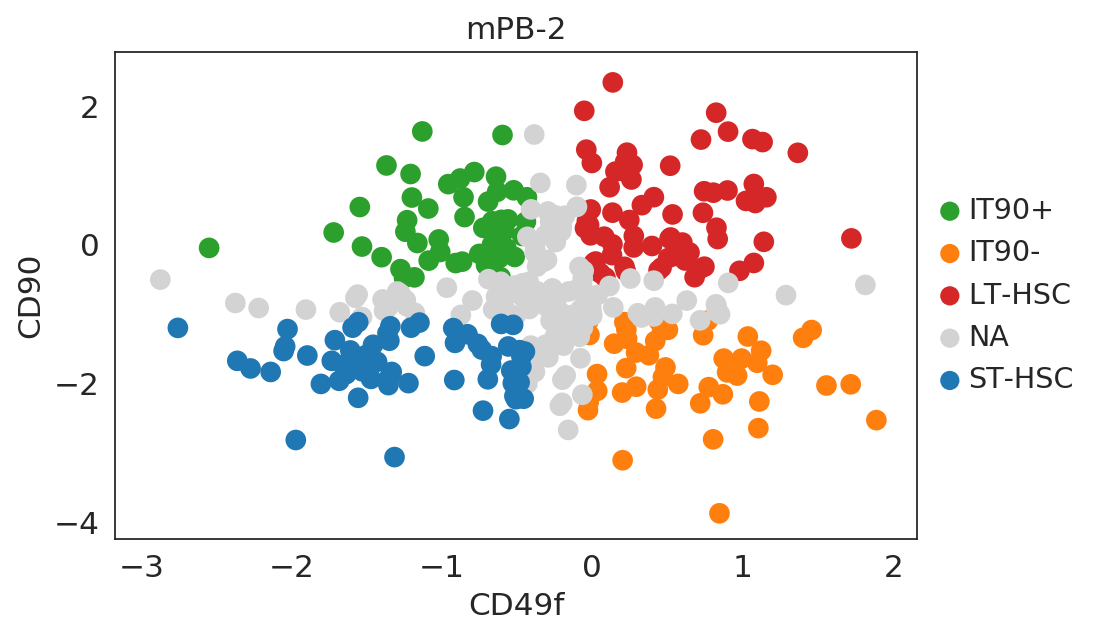

Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'grouping' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Population' as categorical


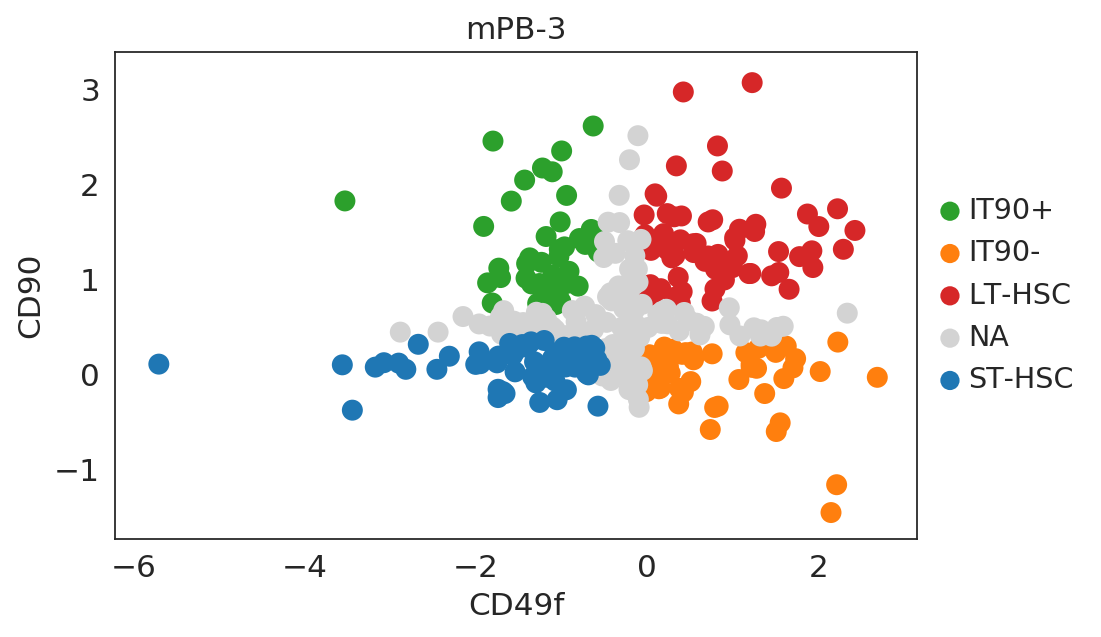

Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'grouping' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Population' as categorical


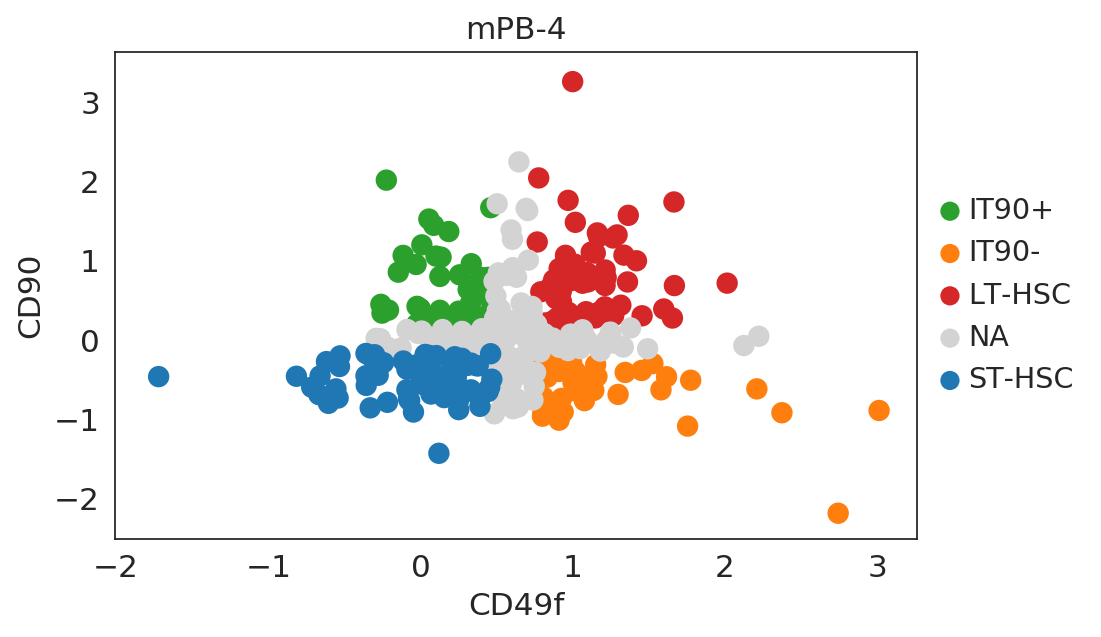

In [49]:
sns.set_style("white")
sc.pl.scatter(flowdata[flowdata.obs['Donor'] == "BM2"] , y = 'CD90', x = 'CD49f', color = 'grouping', title="mPB-2", palette = ['#2ca02c', '#ff7f0e', '#d62728', 'lightgrey', '#1f77b4'], save="_mPB2_gating.png")
sc.pl.scatter(flowdata[flowdata.obs['Donor'] == "BM3"] , y = 'CD90', x = 'CD49f', color = 'grouping', title="mPB-3", palette = ['#2ca02c', '#ff7f0e', '#d62728', 'lightgrey', '#1f77b4'], save="_mPB3_gating.png")
sc.pl.scatter(flowdata[flowdata.obs['Donor'] == "BM4"] , y = 'CD90', x = 'CD49f', color = 'grouping', title="mPB-4", palette = ['#2ca02c', '#ff7f0e', '#d62728', 'lightgrey', '#1f77b4'], save="_mPB4_gating.png")

In [73]:
flowdata

AnnData object with n_obs × n_vars = 1191 × 10000 
    obs: 'Donor', 'Plate', 'CD45RA', 'CD34', 'CD38', 'CD49f', 'CD90', 'log10_total_counts', 'log10_total_features_by_counts', 'pct_counts_MT', 'S.Score', 'G2M.Score', 'Cycle.Score', 'Cycling', 'Stemness.Score', 'DNMT3A.Score', 'DNMT3A_mut', 'median_gene_length', 'batch', 'DCA_split', 'n_counts', 'size_factors', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'louvain', 'root', 'end', 'S_score', 'G2M_score', 'phase', 'grouping'
    var: 'n_cells-BM4', 'n_counts-BM4', 'means-BM4', 'dispersions-BM4', 'dispersions_norm-BM4', 'n_cells-BM3', 'n_counts-BM3', 'means-BM3', 'dispersions-BM3', 'dispersions_norm-BM3', 'n_cells-BM2', 'n_counts-BM2', 'means-BM2', 'dispersions-BM2', 'dispersions_norm-BM2', 'n_cells-BM1', 'n_counts-BM1', 'means-BM1', 'dispersions-BM1', 'dispersions_norm-BM1', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'Donor_colors', 'diffmap_evals', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'v

In [79]:
flowdata = adata_dpt.copy()
flowdata = flowdata[flowdata.obs['CD34'] > 0]

def flowsort(flowdata, high, low):
    
    CD49f_plus = flowdata.obs['CD49f'] > np.quantile(flowdata.obs['CD49f'], high)
    CD49f_minus = flowdata.obs['CD49f'] < np.quantile(flowdata.obs['CD49f'], low)
    CD90_plus = flowdata.obs['CD90'] > np.quantile(flowdata.obs['CD90'], high)
    CD90_minus = flowdata.obs['CD90'] < np.quantile(flowdata.obs['CD90'], low)
    
    flowdata.obs['grouping'] = np.where(CD90_plus & CD49f_plus, "LT-HSC", 
                                       np.where(CD90_minus & CD49f_minus, "ST-HSC",
                                              np.where(CD90_plus & CD49f_minus, "IT90+",
                                                       np.where(CD90_minus & CD49f_plus, "IT90-", "NA"))))
    return flowdata

flowdata.obs['CD90'] = scipy.stats.zscore(flowdata.obs['CD90'])
flowdata.obs['CD49f'] = scipy.stats.zscore(flowdata.obs['CD49f'])

flowBM2 = flowsort(flowdata[flowdata.obs['Donor'] == "mPB-2"], 0.6, 0.4)
flowBM3 = flowsort(flowdata[flowdata.obs['Donor'] == "mPB-3"], 0.6, 0.4)
flowBM4 = flowsort(flowdata[flowdata.obs['Donor'] == "mPB-4"], 0.6, 0.4)

flow_sorted = flowBM4.concatenate(flowBM3, flowBM2, join='outer')

flow_sorted.obs_names = flowdata.obs_names
flowdata.obs['grouping'] = flow_sorted.obs['grouping']

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
layers concatenation is not yet available for 'outer' intersection and will be ignored.


/home/azeng/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1172: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'grouping' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Population' as categorical


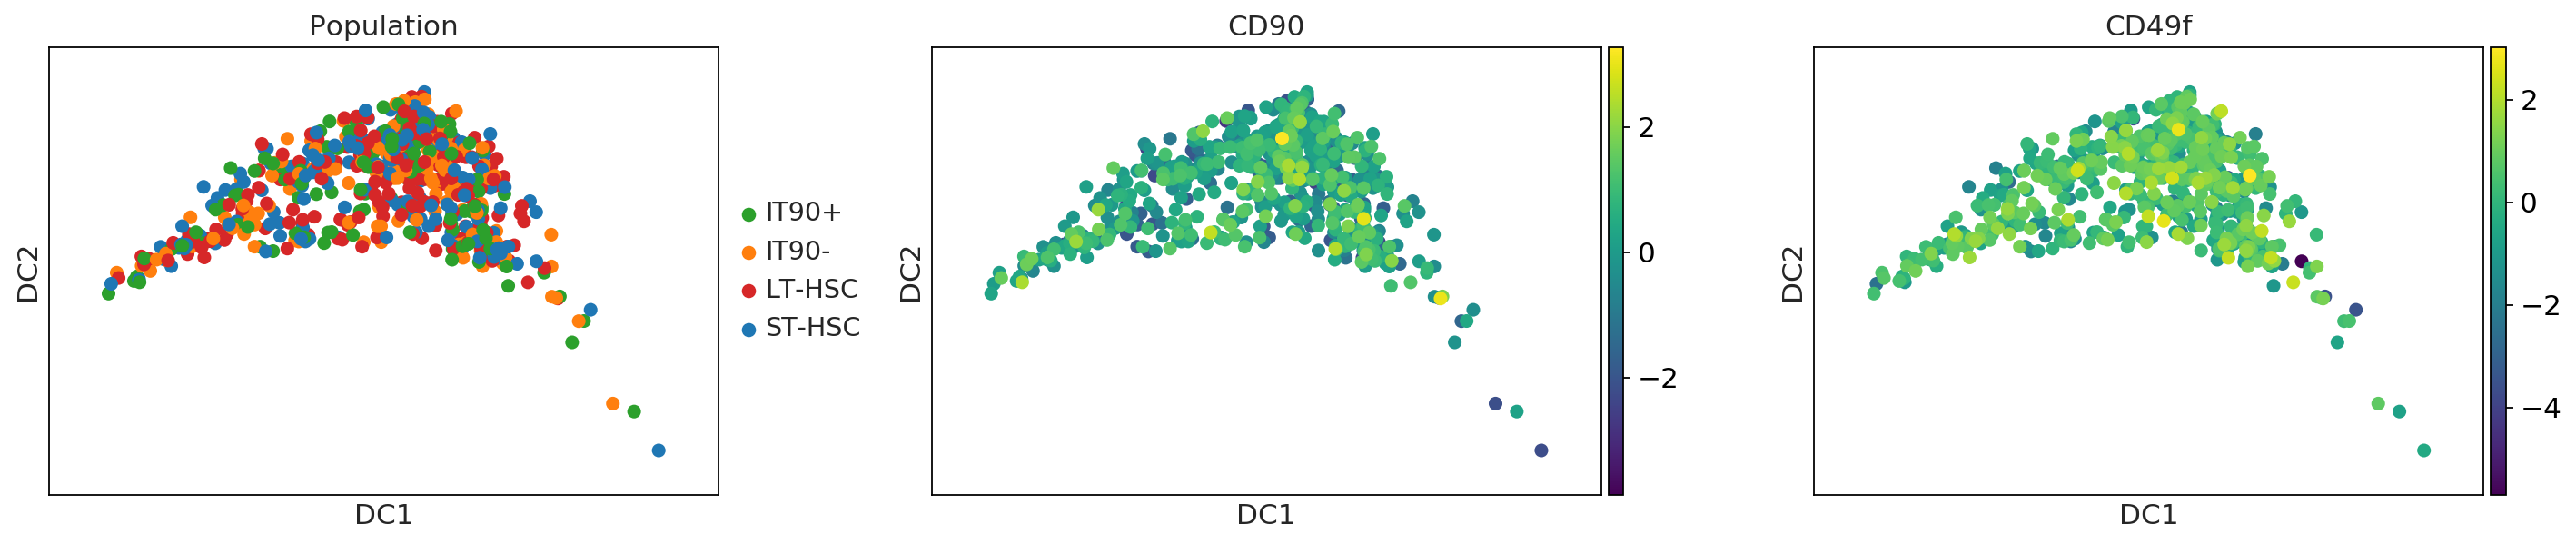

In [83]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

flowdata.obs['Population'] = flowdata.obs['grouping']
sc.pl.diffmap(flowdata[flowdata.obs.Population != "NA"], color=['Population', 'CD90', 'CD49f'], palette = ['#2ca02c', '#ff7f0e', '#d62728', '#1f77b4'], 
              ncols=3, wspace=0.2, color_map='viridis', save = "_Population_CD90_CD49f.png")

In [6]:
lt_dpt = adata_dpt.copy()

lt_dpt.obs['INKA1'] = lt_dpt.X[:,lt_dpt.var_names == "INKA1"]
lt_dpt.obs['CDK6'] = lt_dpt.X[:,lt_dpt.var_names == "CDK6"]
lt_dpt.obs['NECTIN2'] = lt_dpt.X[:,lt_dpt.var_names == "NECTIN2"]
lt_dpt.obs['PAK4'] = lt_dpt.X[:,lt_dpt.var_names == "PAK4"]
lt_dpt.obs['AFDN'] = lt_dpt.X[:,lt_dpt.var_names == "AFDN"]

dpt_plot = lt_dpt.obs[['INKA1', "CDK6", "NECTIN2", "PAK4", "AFDN", "dpt_pseudotime"]]

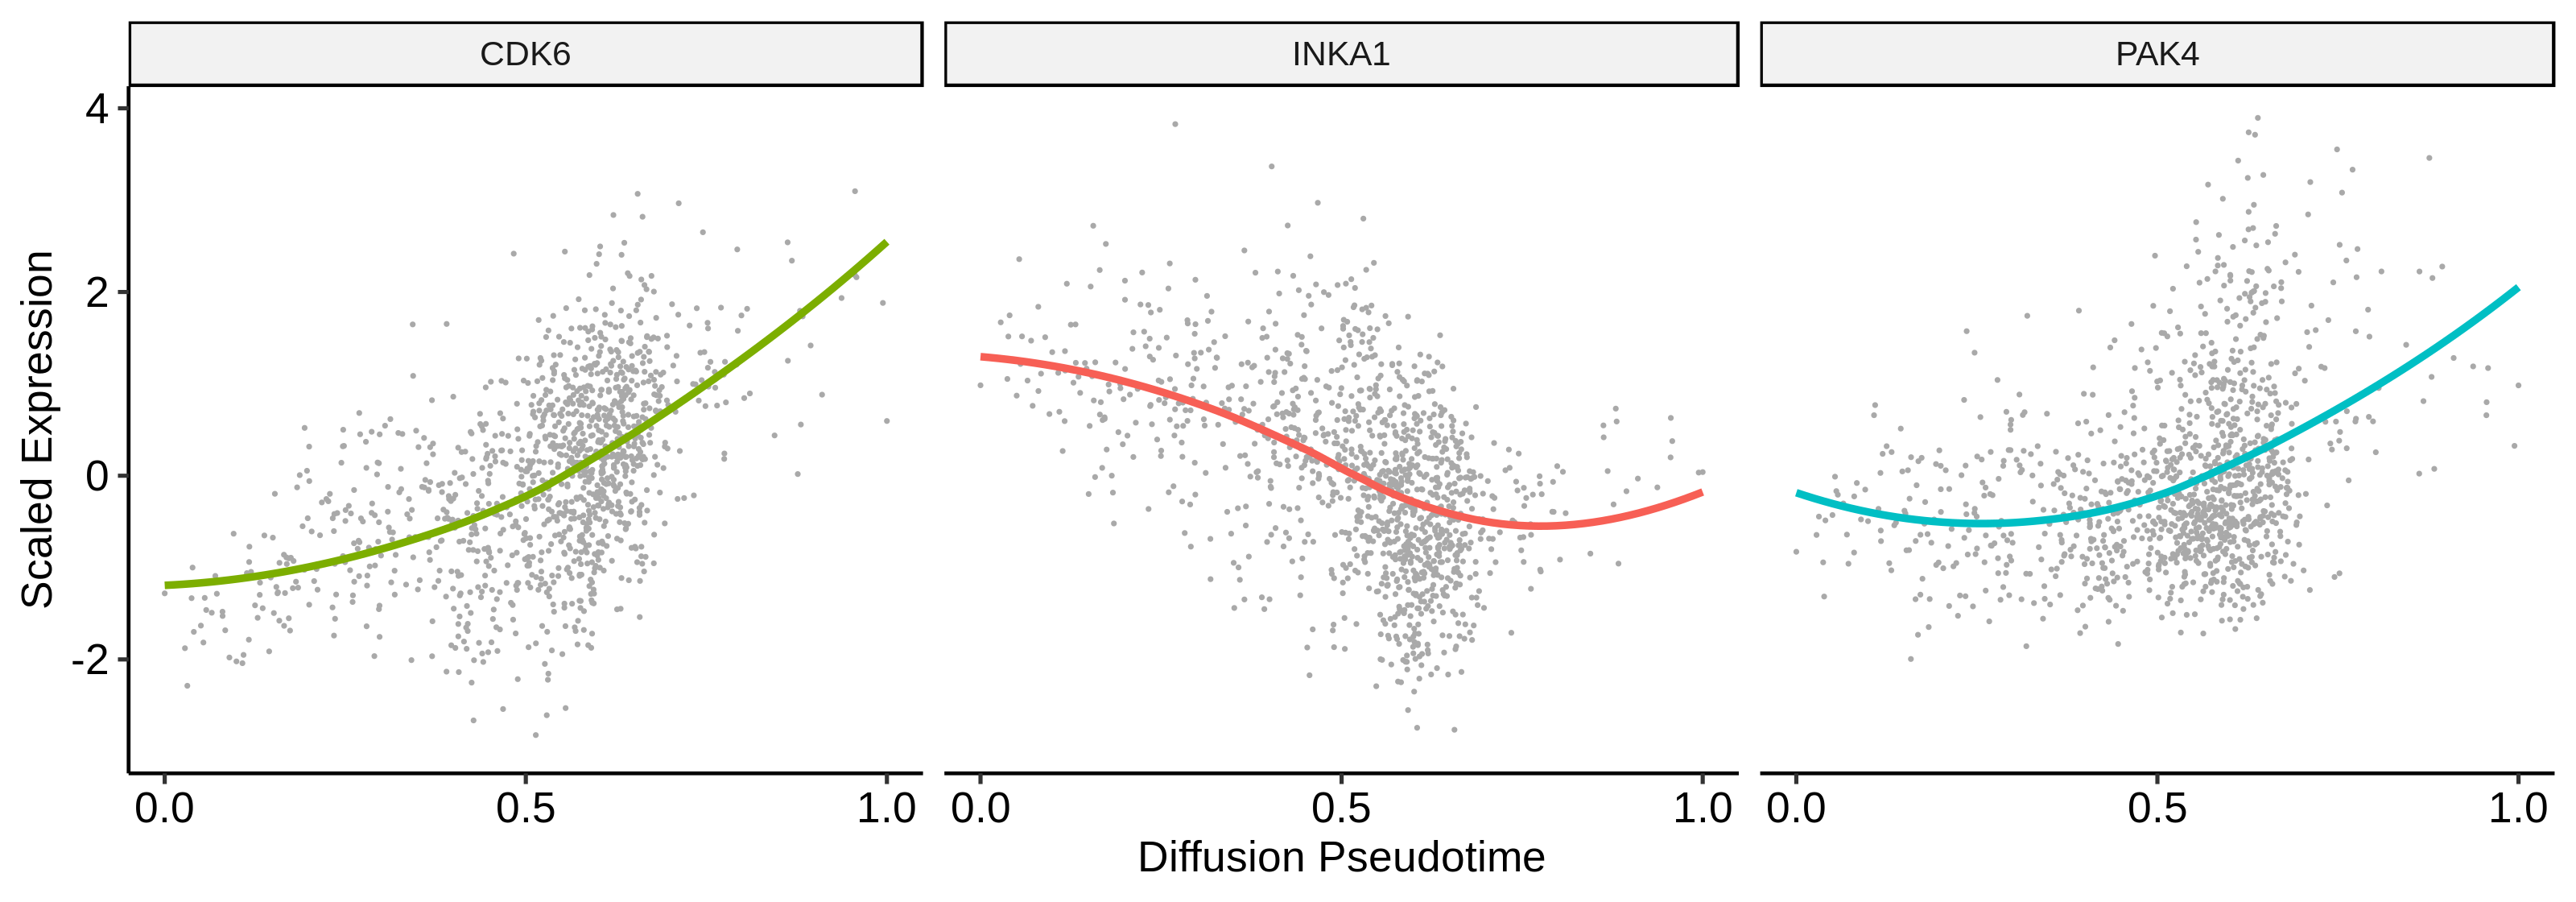

In [22]:
%%R -i dpt_plot -w 10 -h 3.5 --units in -r 320

library(tidyverse)
library(ggpubr)

dpt_plot = dpt_plot %>% gather(key = "gene", value = "scaled_expression", -dpt_pseudotime)

pseudotime = dpt_plot %>% 
    filter(!(gene %in% c("NECTIN2", "AFDN"))) %>% 
    mutate(gene = factor(gene, levels=c("CDK6", "INKA1", "PAK4"))) %>% 
    ggplot(aes(x = dpt_pseudotime, y = scaled_expression, color = gene)) +
    geom_point(size=0.1, color='darkgrey') +
    geom_smooth(method = "loess", se = FALSE, span = 1) + 
    facet_wrap(~gene, ncol=3) +
    theme_pubr() + 
    scale_x_continuous(breaks=c(0,0.5, 1)) + 
    scale_color_manual(values=c("#7CAE00", "#F75F55", "#00BFC4")) +
    ylim(-2.9, 3.9) +
    ylab("Scaled Expression") +
    xlab("Diffusion Pseudotime") +
    theme(legend.position = "None") 
    
pseudotime# + ggsave("figures/Pseudotime_CDK6_INKA1_PAK4.png", width = 10, height = 3.5, dpi = 'retina')
print(pseudotime)

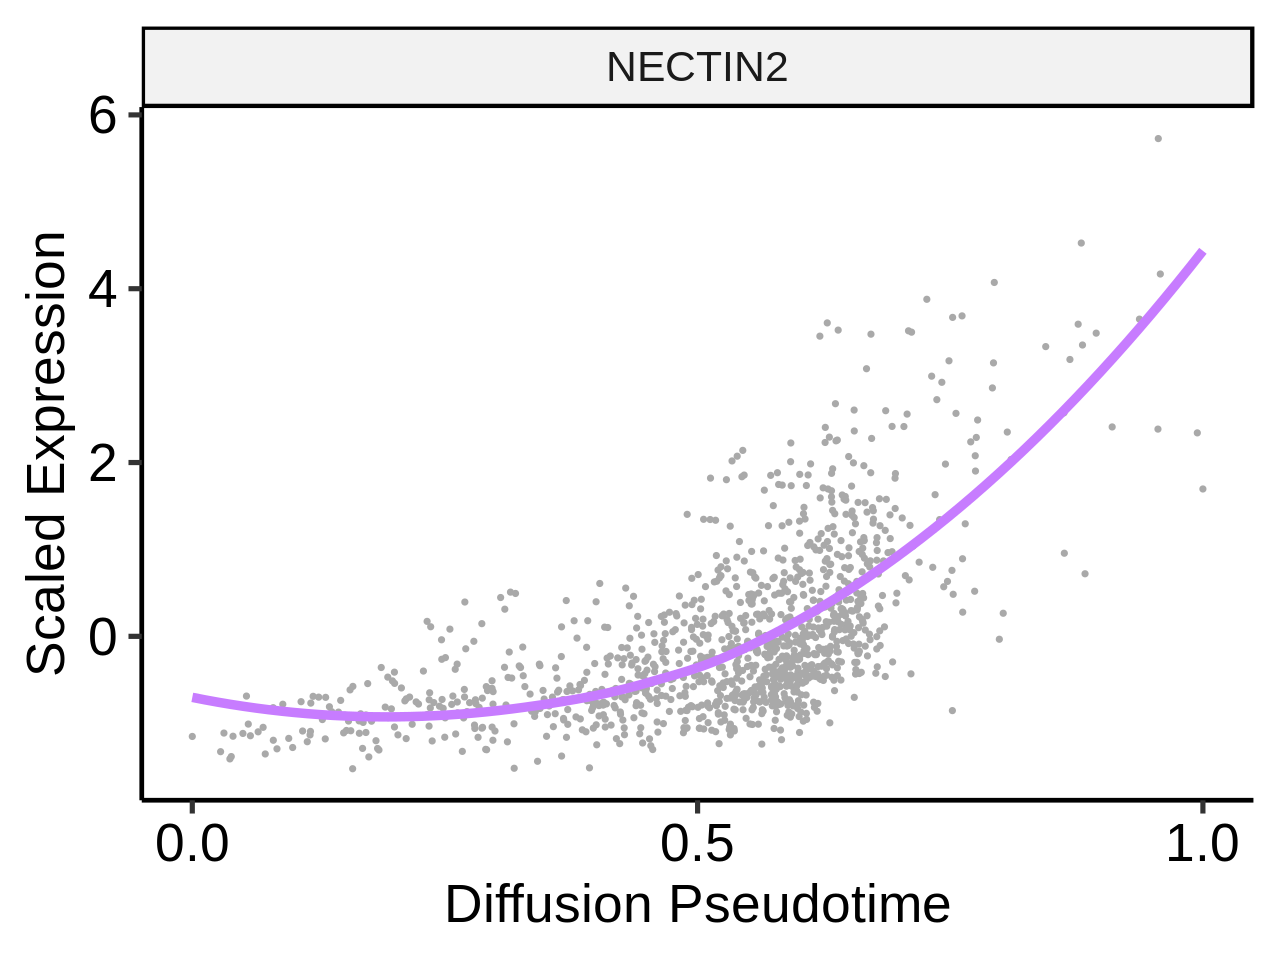

In [23]:
%%R -w 4 -h 3 --units in -r 320

pseudotime = dpt_plot %>% 
    filter(gene == "NECTIN2") %>% 
    ggplot(aes(x = dpt_pseudotime, y = scaled_expression, color = gene)) +
    geom_point(size=0.1, color='darkgrey') +
    geom_smooth(method = "loess", se = FALSE, span = 1) + 
    facet_wrap(~gene, ncol=3) +
    theme_pubr() + 
    scale_x_continuous(breaks=c(0,0.5, 1)) + 
    scale_color_manual(values=c("#C77CFF")) +
    ylab("Scaled Expression") + 
    xlab("Diffusion Pseudotime") + 
    theme(legend.position = "None")
    
pseudotime + ggsave("figures/Pseudotime_NECTIN2.png", width = 4, height = 3, dpi = 'retina')
print(pseudotime)

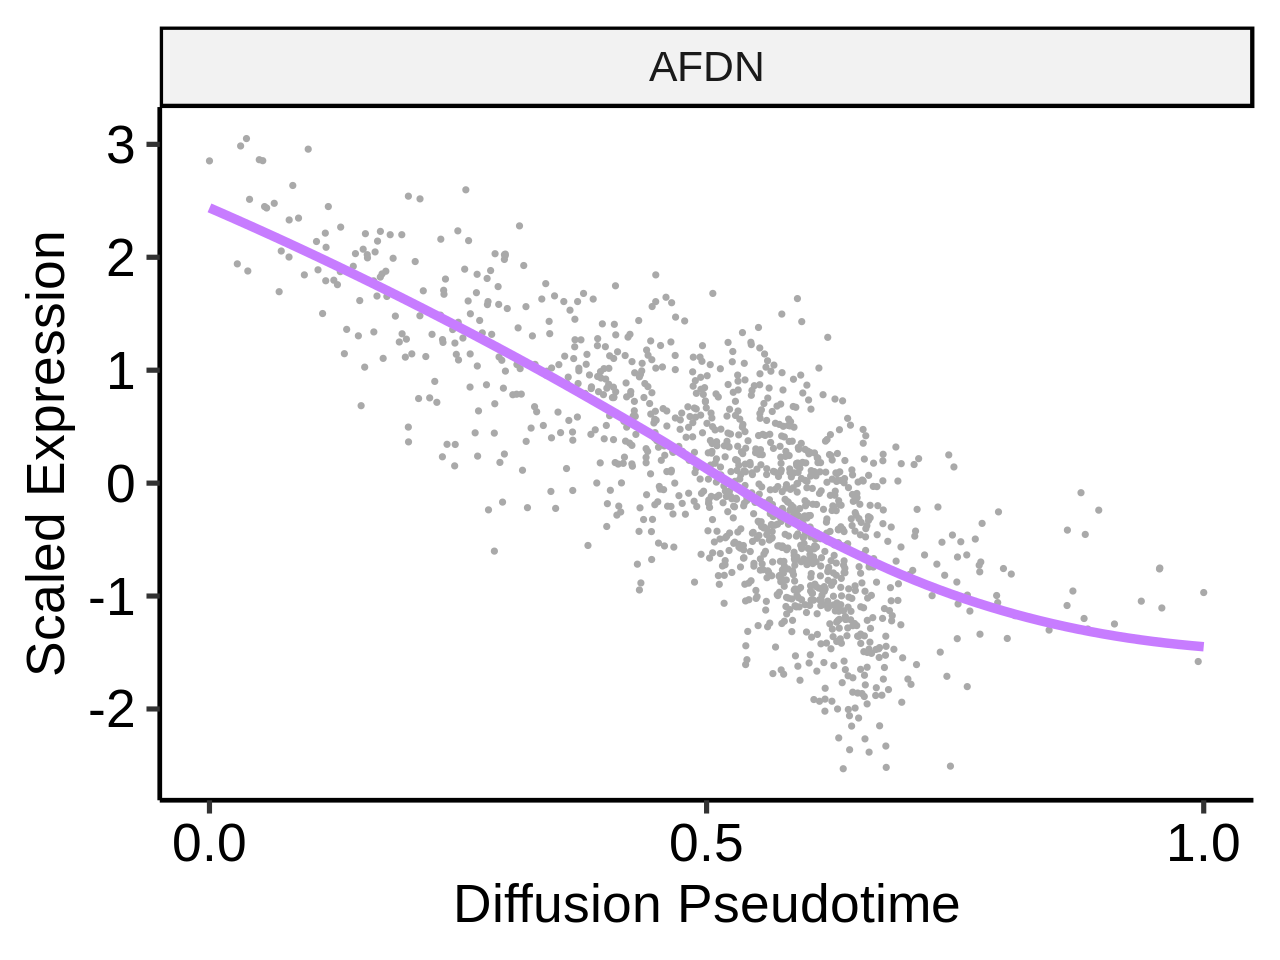

In [13]:
%%R -w 4 -h 3 --units in -r 320

pseudotime = dpt_plot %>% 
    filter(gene == "AFDN") %>% 
    ggplot(aes(x = dpt_pseudotime, y = scaled_expression, color = gene)) +
    geom_point(size=0.1, color='darkgrey') +
    geom_smooth(method = "loess", se = FALSE, span = 1) + 
    facet_wrap(~gene, ncol=3) +
    theme_pubr() + 
    scale_x_continuous(breaks=c(0,0.5, 1)) + 
    scale_color_manual(values=c("#C77CFF")) +
    ylab("Scaled Expression") + 
    xlab("Diffusion Pseudotime") + 
    theme(legend.position = "None")
    
pseudotime + ggsave("figures/Pseudotime_AFDN.png", width = 4, height = 3, dpi = 'retina')
print(pseudotime)

In [463]:
# adata_dpt.write_h5ad("mPB_adata_DPT.h5ad")